In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

import os
import pickle
from PIL import Image
import sys

import torch
from torchvision import transforms

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from sapir_image_captions.checkpoints import load_checkpoint
from sapir_image_captions.models import beam_search_caption_generation
from sapir_image_captions.utils import text2tensor, tensor2text

In [2]:
images_dir = "/Users/benpeloquin/Data/general/multi30k/flickr30k-images/"
# image2_fp = os.path.join(images_dir, "97233789.jpg")


### Statistical tests for attention?

* For each caption we have a distribution over pixels, conditioned on each word.
* For each image we have 5 independent captions
* English vs German dis

### How do language encodings change representational space?

### Frog stories metrics?

Notes for meeting with MF
* attention during sentence production - Zenzi Griffin & Bach -> lookin anticipatorily at nouns *before* production (that eye movements are attention / dynamics of production)
* next step for cross-linguistics variation
    + what are the hypotheses?
    + In general manner vs path from Slobin stuff
    + make `manner vs path` central organizing -- how event information is encoded
    + what is happening in attention for verbs (different compared en - any goal information encoded)
    + look for tense and aspect type markers in ground truth (as well as generated --> markers for ongoing events)
    + is ther an `ing` --> look at morphology
    + manner path hypothesis.. Axis of varatino is degree to which different parts of different events are encoded grammtically (as opposed to optionalmodifiers)
    + is visual attenti
    
    + pretraining might allow us to produce better captions -- what are the differences with and without embeddings.
    + corpus processing stuff to see what diagnostics --> word lists of manner vs path verbs
    + process gold and existing systems w.r.t manner path tense and aspect


In [3]:
image_fp = os.path.join(images_dir, '97234558.jpg')
caption = "a young girl wades out into the water wearing safety floatation devices on her arms"
# en_alpha, de_alpha, _, _ = compare_models(encoder1, encoder2, 
#                                     decoder1, decoder2,
#                                     vocab1, vocab2, image_fp, caption)

In [4]:
cap1 = "a young girl wades out into the water wearing safety floatation devices on her arms"
img = Image.open(image_fp)

In [5]:
en_model_dir_path = "/Users/benpeloquin/Data/projects/sapir_image_captions/trained_models/temp-model"
de_model_dir_path = "/Users/benpeloquin/Data/projects/sapir_image_captions/trained_models/ic1-de-20190427/"

In [6]:
encoder1, decoder1, vocab1, checkpoint1 = load_checkpoint(en_model_dir_path)
encoder1.eval()
decoder1.eval()

encoder2, decoder2, vocab2, checkpoint2 = load_checkpoint(de_model_dir_path)
encoder2.eval()
decoder2.eval()

INFO:root:
    Loading best model -->
        Epoch:	17
        train loss:	4.081112302714381

        dev loss:	4.213397200996353

        test loss:	4.20603200340271

    
INFO:root:
    Loading best model -->
        Epoch:	45
        train loss:	4.540387802650189

        dev loss:	5.001200847136668

        test loss:	5.016129035949707

    


CaptionDecoder(
  (attention): Attention(
    (encoder_att): Linear(in_features=2048, out_features=512, bias=True)
    (decoder_att): Linear(in_features=256, out_features=512, bias=True)
    (full_att): Linear(in_features=512, out_features=1, bias=True)
    (relu): ReLU()
    (softmax): Softmax()
  )
  (embedding): Embedding(13455, 256)
  (dropout): Dropout(p=0.5)
  (decode_step): LSTMCell(2304, 256)
  (init_h): Linear(in_features=2048, out_features=256, bias=True)
  (init_c): Linear(in_features=2048, out_features=256, bias=True)
  (f_beta): Linear(in_features=256, out_features=2048, bias=True)
  (sigmoid): Sigmoid()
  (fc): Linear(in_features=256, out_features=13455, bias=True)
)

In [7]:
# im1 = Image.open(image_fp)
# im2 = Image.open(image2_fp)
# caption, cap_len = text2tensor("a young girl wades out into the water wearing"
#                    " safety floatation devices on her arms".split(" "), 
#                    vocab1)
# caption2, cap_len2 = text2tensor("a man , who is wearing the tan coat , is "
#                                  "gambling at a casino slot machine .".split(" "), 
#                                  vocab1)

In [8]:
image_transform = transforms.Compose([
    # Note (BP): resizing (256, 256) 
    # here was picked somewhat arbitrarily,
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

In [9]:
device = torch.device('cpu')
X_image = image_transform(img).unsqueeze(0); 
beam_search_caption_generation(X_image, encoder1, decoder1, vocab1, device)

> /Users/benpeloquin/Desktop/Projects/sapir_image_captions/sapir_image_captions/models.py(299)beam_search_caption_generation()
-> encoder_out = encoder_out.expand(k, num_pixels, encoder_dim)
(Pdb) print(step)
*** NameError: name 'step' is not defined
(Pdb) c
> /Users/benpeloquin/Desktop/Projects/sapir_image_captions/sapir_image_captions/models.py(378)beam_search_caption_generation()
-> break
(Pdb) print(step)
51
(Pdb) seqs
tensor([[   2,    2, 9862, 9862, 9862, 9862, 6849, 6849, 6849, 6849, 6849, 6849,
         6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849,
         6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849,
         6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849,
         6849, 6849, 6849, 6849],
        [   2,    2, 9862, 9862, 9862, 9862, 9862, 6849, 6849, 6849, 6849, 6849,
         6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849, 6849,
         6849, 6849, 6849, 6849, 6849, 6849, 6849, 68

BdbQuit: 

In [22]:
X_in = img_tensor.unsqueeze(0); 
X_in.size()

NameError: name 'img_tensor' is not defined

In [146]:
X_encoded = encoder(X_in)
X_caption = torch.tensor(caption2).unsqueeze(0)
scores, captions_sorted, decode_lens, alphas, sort_idxs = \
    decoder(X_encoded, X_caption, torch.tensor([cap_len2]))

/Users/benpeloquin/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [147]:
recon_caption = tensor2text(torch.argmax(scores, dim=-1), vocab)

In [3]:
def visualize_att(image_path, seq, alphas, rev_word_map, smooth=True):
    """
    Visualizes caption with weights at every word.
    Adapted from paper authors' repo: https://github.com/kelvinxu/arctic-captions/blob/master/alpha_visualization.ipynb
    :param image_path: path to image that has been captioned
    :param seq: caption
    :param alphas: weights
    :param rev_word_map: reverse word mapping, i.e. ix2word
    :param smooth: smooth weights?
    """
    image = Image.open(image_path)
    image = image.resize([14 * 24, 14 * 24], Image.LANCZOS)

    words = [rev_word_map[ind] for ind in seq]
    
    plt.figure(figsize=(18, 9))
    for t in range(alphas.shape[0]):
#   for t in range(len(words)):
        if t > 50:
            break
        plt.subplot(np.ceil(len(words) / 5.), 5, t + 1)

        plt.text(0, 1, '%s' % (words[t]), 
                 color='black', backgroundcolor='white', fontsize=12)
        plt.imshow(image)
        alpha = alphas[t, :].detach().numpy()

        if smooth:
            alpha = skimage.transform.pyramid_expand(alpha, upscale=24, sigma=8)
            import pdb; pdb.set_trace()
        else:
            alpha = skimage.transform.resize(alpha, [14 * 24, 14 * 24])
            
        if t == 0:
            plt.imshow(alpha, alpha=0)
        else:
            plt.imshow(alpha, alpha=0.8)
        plt.set_cmap(cm.Greys_r)
        plt.axis('off')
    plt.show()

In [148]:
import numpy as np
import skimage.transform

# visualize_att(image_fp, caption, alphas.squeeze(0), vocab.itos, smooth=True)

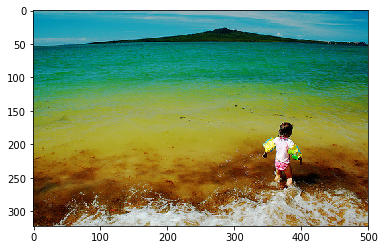

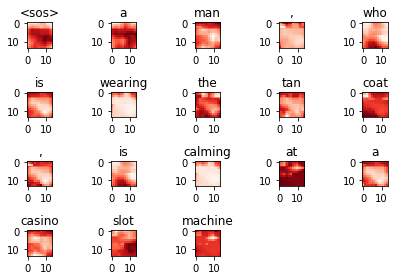

In [149]:
plt.imshow(im1)
plt.show()
for t in range(alphas.shape[1]):
    alpha = alphas[0, t, :].detach().numpy() * 255.
    plt.subplot(np.ceil(alphas.shape[1] / 5.), 5, t + 1)
    plt.imshow(alpha.reshape(14, 14))
    plt.title("{}".format(recon_caption[0][t]))
    plt.set_cmap(cm.Reds_r)
plt.tight_layout()


(array([48., 21., 40., 20., 28., 19.,  8.,  7.,  4.,  1.]),
 array([0.0048939 , 0.00496143, 0.00502896, 0.00509649, 0.00516402,
        0.00523155, 0.00529908, 0.00536661, 0.00543414, 0.00550168,
        0.00556921], dtype=float32),
 <a list of 10 Patch objects>)

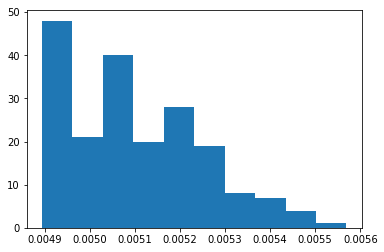

In [150]:
plt.hist(alphas.detach().numpy().mean(1).squeeze())

In [28]:
def compare_models(m1_encoder, m2_encoder, 
                   m1_decoder, m2_decoder, 
                   m1_vocab, m2_vocab,
                   image_fp, caption):
    # Image
    img = Image.open(image_fp)
    image_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ])
    img_tensor = image_transform(img).unsqueeze(0)  # Add batch
    m1_img_encoded = m1_encoder(img_tensor)
    m2_img_encoded = m2_encoder(img_tensor)
    # Caption
    caption1, cap_len1 = text2tensor(caption.split(" "), m1_vocab)
    caption2, cap_len2 = text2tensor(caption.split(" "), m2_vocab)
    X_caption1 = torch.tensor(caption1).unsqueeze(0)  # Add batch
    X_caption2 = torch.tensor(caption2).unsqueeze(0)  # Add batch
    
    scores1, captions_sorted1, decode_lens1, alphas1, sort_idxs1 = \
        m1_decoder(m1_img_encoded, X_caption1, torch.tensor([cap_len1]))
    scores2, captions_sorted2, decode_lens2, alphas2, sort_idxs2 = \
            m2_decoder(m2_img_encoded, X_caption2, torch.tensor([cap_len2]))
    
    caption1 = tensor2text(torch.argmax(scores1, dim=-1), vocab1)
    caption2 = tensor2text(torch.argmax(scores2, dim=-1), vocab2)
    
    return alphas1, alphas2, caption1, caption2
    
    

In [32]:
en_alpha_pre = en_alpha.mean(1).squeeze().detach().numpy()
de_alpha_pre = de_alpha.mean(1).squeeze().detach().numpy()

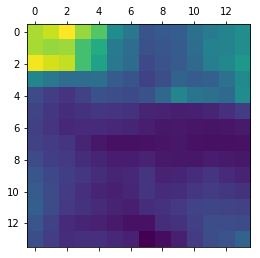

In [33]:
plt.matshow((en_alpha_pre - de_alpha_pre).reshape(14, 14))

In [119]:
from scipy.special import kl_div

In [123]:
def kl(x1, x2):
    return np.sum(x1 * np.log(x1/x2))

In [124]:
kl(en_alpha_pre, de_alpha_pre)

0.00012682751

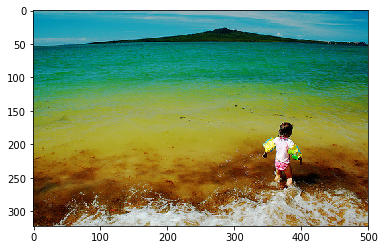

/Users/benpeloquin/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


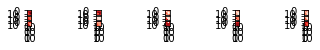

In [39]:
img = Image.open(image_fp)
plt.imshow(img)
plt.show()
for t in range(en_alpha.shape[1]):
    alpha = en_alpha[0, t, :].detach().numpy() * 255.
    plt.subplot(np.ceil(alpha.shape[0] / 5.), 5, t + 1)
    plt.imshow(alpha.reshape(14, 14))
#     plt.title("{}".format(recon_caption[0][t]))
    plt.set_cmap(cm.Reds_r)
plt.tight_layout()